In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\emmau\AppData\Local\Temp\pip-install-yt04aae6\tensorflow-gpu_82c6a4b88373492bbbd0851b98fca686\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautif

In [7]:
!pip install keras

In [1]:
import tensorflow as tf
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt
import PIL

import random
from shutil import copyfile
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense,Dropout,Input,Flatten
from tensorflow.keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
data_dir = './data/'

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 177 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

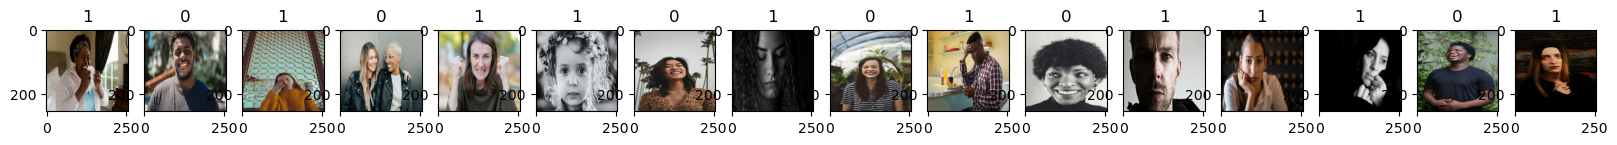

In [8]:
fig, ax = plt.subplots(ncols=16, figsize=(20,20))
for idx, img in enumerate(batch[0][:16]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your data folder
data_folder = 'data'

# Set the path to create train and validation folders
train_folder = 'train'
val_folder = 'val'

# Create train and validation folders
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Copy images from the original folders to train and validation folders
for emotion in ['happy', 'sad']:
    source_folder = os.path.join(data_folder, emotion)
    train_destination = os.path.join(train_folder, emotion)
    val_destination = os.path.join(val_folder, emotion)

    # Create train and validation subfolders for each emotion
    os.makedirs(train_destination, exist_ok=True)
    os.makedirs(val_destination, exist_ok=True)

    # Get the list of images in the source folder
    images = os.listdir(source_folder)

    # Calculate the split index
    split_index = int(0.9 * len(images))

    # Copy images to the train folder
    for img in images[:split_index]:
        shutil.copy(os.path.join(source_folder, img), os.path.join(train_destination, img))

    # Copy images to the validation folder
    for img in images[split_index:]:
        shutil.copy(os.path.join(source_folder, img), os.path.join(val_destination, img))

# Optionally, you can use data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255
)

# Define the ImageDataGenerator for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

# Create image generators for the training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'  # 'binary' for two classes (happy and sad)
)

val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 159 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [11]:
img_height,img_width=256,256
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 177 files belonging to 2 classes.
Using 160 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 177 files belonging to 2 classes.


Using 17 files for validation.


In [13]:
classes = train_ds.class_names
classes

['happy', 'sad']

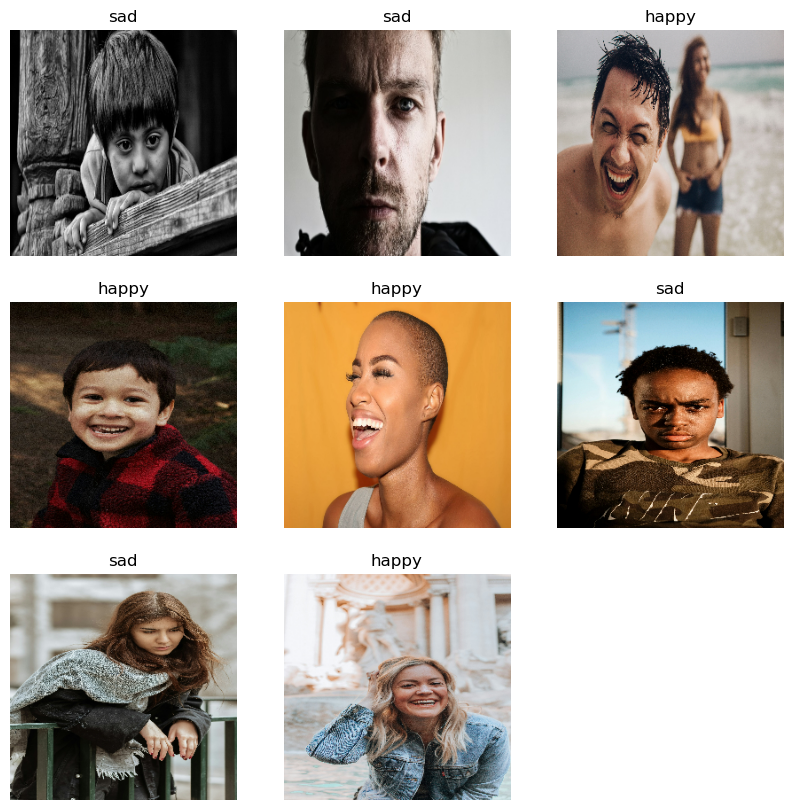

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [17]:

mobilenet= tf.keras.applications.MobileNetV2(include_top=False,
                   input_tensor=Input(shape=(256,256,3)),
                   weights='imagenet')
mobilenet.trainable=False

output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [18]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[0][0]']        

 block_1_depthwise (Depthwi  (None, 64, 64, 96)           864       ['block_1_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_1_depthwise_BN (Batc  (None, 64, 64, 96)           384       ['block_1_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_1_depthwise_relu (Re  (None, 64, 64, 96)           0         ['block_1_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_1_project (Conv2D)    (None, 64, 64, 24)           2304      ['block_1_depthwise_relu[0][0]
          

In [20]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
model_checkpoint = ModelCheckpoint('./model_weights/model_{epoch:02d}-{val_accuracy:.6f}.h5', 
                                   monitor='val_loss', mode='min', verbose=1, 
                                   save_best_only=True,save_weights_only=True)

In [22]:
hist = model.fit(
    train_generator,
    epochs = 20,
    validation_data=val_generator,
    callbacks=[model_checkpoint])

Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 7.0553 - accuracy: 0.5346 
Epoch 1: val_loss improved from inf to 0.69315, saving model to ./model_weights\model_01-0.500000.h5
5/5 [==============================] - 183s 37s/step - loss: 7.0553 - accuracy: 0.5346 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.4969 
Epoch 2: val_loss did not improve from 0.69315
5/5 [==============================] - 160s 32s/step - loss: 0.6805 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 0.6804 - accuracy: 0.4969 
Epoch 3: val_loss did not improve from 0.69315
5/5 [==============================] - 160s 32s/step - loss: 0.6804 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.4969 
Epoch 4: val_loss did not improve from 0.69315

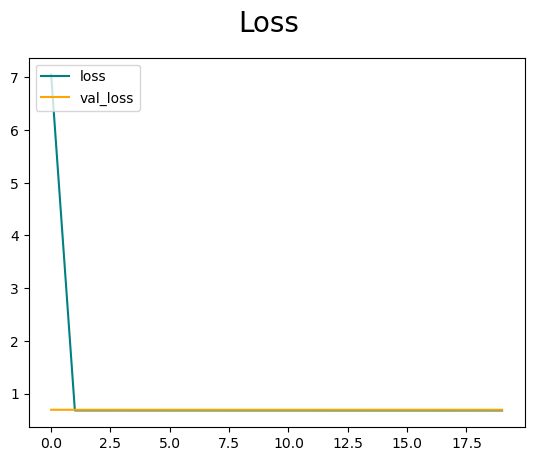

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

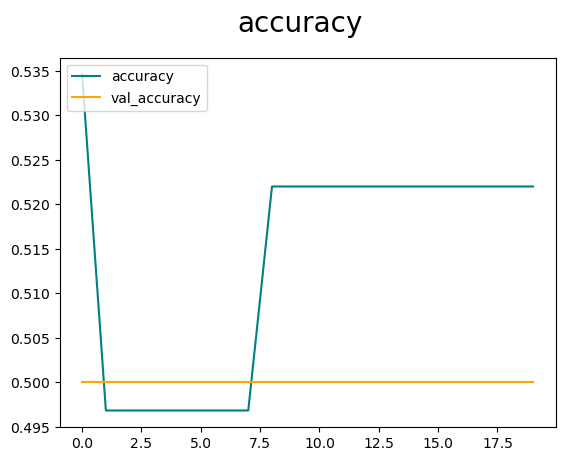

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [77]:
# train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
#train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    #class_mode='binary',batch_size=25,shuffle=True)

In [25]:
#val_generator = val_datagen.flow_from_directory(test_dir, target_size=(160,160), color_mode='rgb', class_mode='binary', batch_size=25)

In [80]:
#data = data.map(lambda x,y: (x/255, y))

In [81]:
#data.as_numpy_iterator().next()

In [11]:
#happy = os.path.join('./data/happy')
#sad = os.path.join('./data/sad')

In [82]:
# happy_names = os.listdir(happy)
# print(f'HAPPY FACES: {happy_names[:10]}')

# sad_names = os.listdir(sad)
# print(f'SAD FACES: {sad_names[:10]}')

In [83]:
# print(f'total training happy faces images: {len(os.listdir(happy))}')
# print(f'total training sad faces images: {len(os.listdir(sad))}')

In [14]:
# %matplotlib inline

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Parameters for our graph; we'll output images in a 4x4 configuration
# nrows = 4
# ncols = 4

# # Index for iterating over images
# pic_index = 0

In [84]:
# # Set up matplotlib fig, and size it to fit 4x4 pics
# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8
# next_happy_pix = [os.path.join(happy, fname) 
#                 for fname in happy_names[pic_index-8:pic_index]]
# next_sad_pix = [os.path.join(sad, fname) 
#                 for fname in sad_names[pic_index-8:pic_index]]

# for i, img_path in enumerate(next_happy_pix+next_sad_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

In [85]:
# import os
# import shutil
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set the path to your data folder
# data_folder = 'data'

# # Set the path to create train and validation folders
# train_folder = 'train'
# val_folder = 'val'

# # Create train and validation folders
# os.makedirs(train_folder, exist_ok=True)
# os.makedirs(val_folder, exist_ok=True)

# # Copy images from the original folders to train and validation folders
# for emotion in ['happy', 'sad']:
#     source_folder = os.path.join(data_folder, emotion)
#     train_destination = os.path.join(train_folder, emotion)
#     val_destination = os.path.join(val_folder, emotion)

#     # Create train and validation subfolders for each emotion
#     os.makedirs(train_destination, exist_ok=True)
#     os.makedirs(val_destination, exist_ok=True)

#     # Get the list of images in the source folder
#     images = os.listdir(source_folder)

#     # Calculate the split index
#     split_index = int(0.9 * len(images))

#     # Copy images to the train folder
#     for img in images[:split_index]:
#         shutil.copy(os.path.join(source_folder, img), os.path.join(train_destination, img))

#     # Copy images to the validation folder
#     for img in images[split_index:]:
#         shutil.copy(os.path.join(source_folder, img), os.path.join(val_destination, img))

# # Optionally, you can use data augmentation for the training set
# train_datagen = ImageDataGenerator(
#     rescale=1./255
# )

# # Define the ImageDataGenerator for the validation set
# val_datagen = ImageDataGenerator(rescale=1./255)

# # Create image generators for the training and validation sets
# train_generator = train_datagen.flow_from_directory(
#     train_folder,
#     target_size=(256, 256),
#     batch_size=64,
#     class_mode='binary'  # 'binary' for two classes (happy and sad)
# )

# val_generator = val_datagen.flow_from_directory(
#     val_folder,
#     target_size=(256, 256),
#     batch_size=16,
#     class_mode='binary'
# )


In [16]:
# train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)
# test_size = int(len(data)*.1)

In [17]:
# train = data.take(train_size)
# val = data.skip(train_size).take(val_size)
# test = data.skip(train_size+val_size).take(test_size)

In [86]:
#train

In [29]:
#mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(160,160, 3)))

In [88]:
#mobilenet.trainable = False

In [89]:
# output = Flatten()(mobilenet.output)
# output = Dropout(0.3)(output)
# output = Dense(units = 8,activation='relu')(output)
# prediction = Dense(1,activation='sigmoid')(output)

In [30]:
# model = Model(inputs = mobilenet.input,outputs = prediction)
# model.summary()

In [91]:
# tell the model what cost and optimization method to use
# model.compile(
#   loss='binary_crossentropy',
#   optimizer=Adam(
#     learning_rate=0.0001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07
# ),
#   metrics=['accuracy']
# )

In [20]:
#os.mkdir('/model_weights/')

In [93]:
#model_checkpoint = ModelCheckpoint('./model_weights/model_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [26]:
# hist = model.fit_generator(
#     train_generator,
#     steps_per_epoch = train_generator.samples // 25,
#     validation_data = val_generator,
#     validation_steps = val_generator.samples // 25,
#     epochs = 20,
#     callbacks=[model_checkpoint])

In [18]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# model = Sequential()
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [19]:
#model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
#model.summary()

In [21]:
#logdir='logs'

In [22]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
#hist = model.fit(train, epochs=20, callbacks=[tensorboard_callback])

In [29]:
# fig = plt.figure()
# plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
# fig.suptitle('Loss', fontsize=20)
# plt.legend(loc="upper left")
# plt.show()

In [30]:
# fig = plt.figure()
# plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
# fig.suptitle('Accuracy', fontsize=20)
# plt.legend(loc="upper left")
# plt.show()

### Prediction

In [120]:
!pip install opencv-python


  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


1/1 [==============================] - 0s 107ms/step


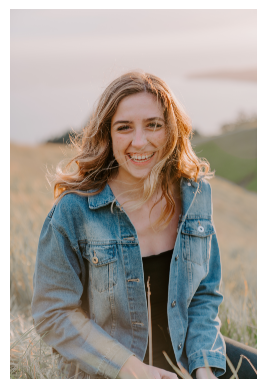

[[0.5113146]]
Prediction: Sad
Resized Image Size: (256, 256)


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2  # Import OpenCV

# Function to load and preprocess an image for prediction
def load_and_process_image(img_path, target_size=(256, 256)):
    # Use OpenCV to load and resize the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Rescale to match the normalization used during training
    return img

# Specify the path to the new image you want to predict
new_image_path = 'inference/test_happy/slav-romanov-BrEAp01_m5w-unsplash.jpg'

# Load and preprocess the new image with resizing to 300x300
new_image = load_and_process_image(new_image_path, target_size=(256, 256))

# Make predictions
predictions = model.predict(new_image)

# Display the original image
img = cv2.imread(new_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, convert to RGB for displaying with matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

# Display the prediction
if predictions[0] > 0.5:
    print(predictions)
    print('Prediction: Sad')
else:
    print(predictions)
    print('Prediction: Happy')

# Display the size of the loaded image
print(f'Resized Image Size: {new_image.shape[1:3]}')